In [27]:
%load_ext autoreload
%autoreload 2

import jax
import jax.numpy as jnp
import numpy as np

from air import geometry
from air.articulation import Ant

import mcubes
import matplotlib.pyplot as plt
from dataclasses import asdict


x = jnp.linspace(-1, 1, 72)
x = jnp.stack(jnp.meshgrid(x, x, x), axis=-1)
ant = Ant.create()
joint_pos = ant.dof.pos.copy()
key = jax.random.PRNGKey(0)
shape = Ant.sdf(ant, x)
vertices, triangles = mcubes.marching_cubes(np.asarray(shape), 0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0.5, 0, 'Z')

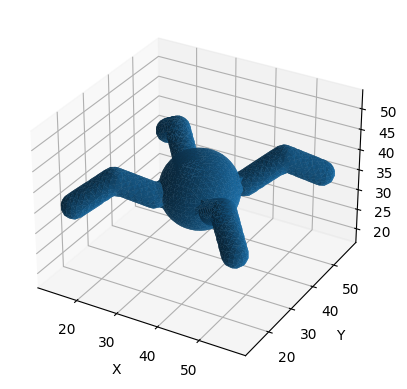

In [28]:
ax = plt.subplot(projection="3d")
ax.plot_trisurf(*vertices.T, triangles=triangles)
ax.axis("equal")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

Text(0.5, 0, 'Z')

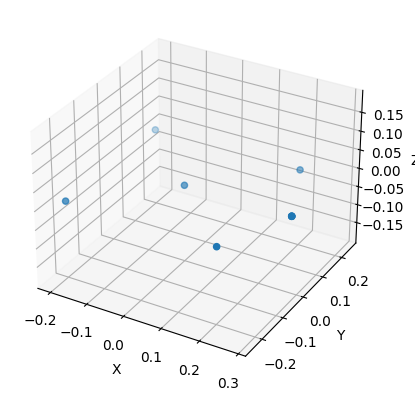

In [29]:
ax = plt.subplot(projection="3d")
ax.scatter(*ant.transform.pos.T)
ax.axis("equal")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

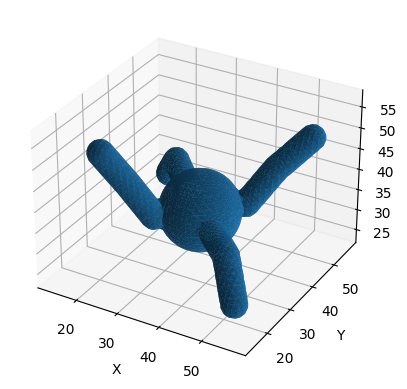

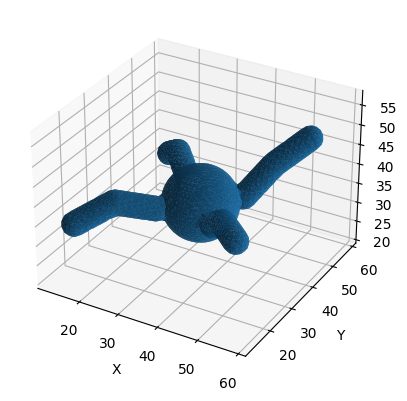

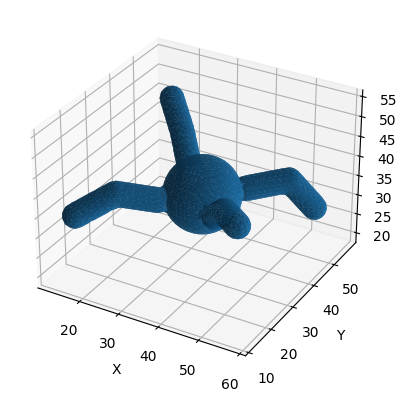

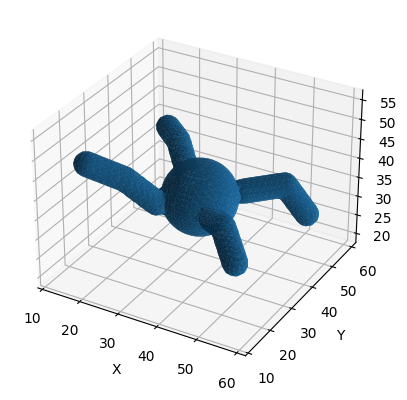

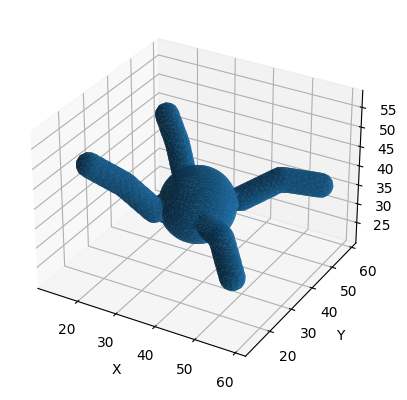

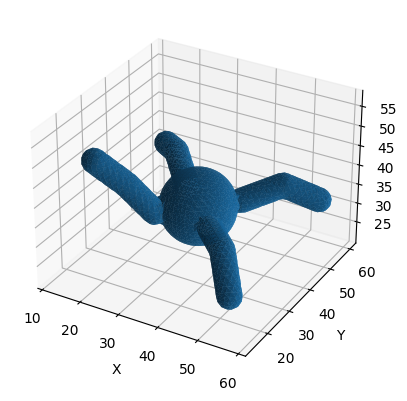

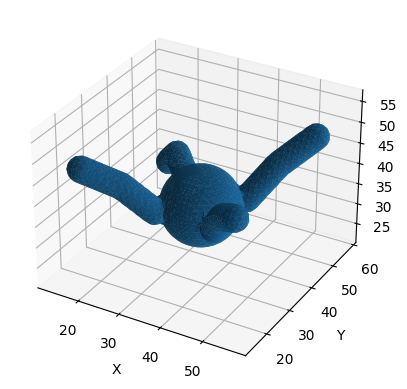

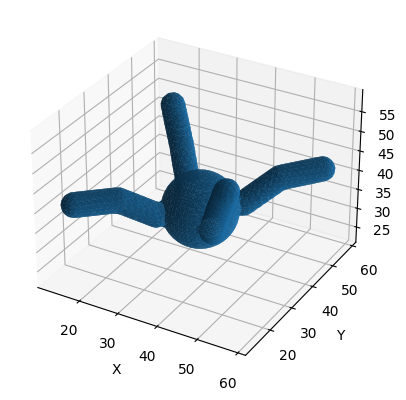

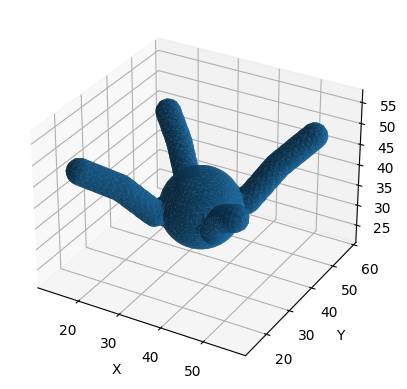

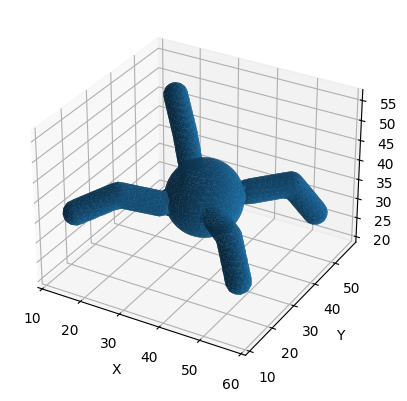

: 

In [33]:
import pickle

for i in range(10):
    key, subkey = jax.random.split(key)
    ant = ant.replace(
        dof= ant.dof.replace(
            pos=(
                joint_pos
                .at[1:5].set(jax.random.uniform(subkey, (4,), minval=-jnp.pi/3, maxval=0))
                .at[5:9].set(jax.random.uniform(subkey, (4,), minval=0, maxval=jnp.pi/3))
            )
        )
    )
    shape = Ant.sdf(ant, x)
    vertices, triangles = mcubes.marching_cubes(np.asarray(shape), 0)
    fig = plt.figure()
    ax = plt.subplot(projection="3d")
    ax.plot_trisurf(*vertices.T, triangles=triangles)
    ax.axis("equal")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    
    fig.savefig(f"data/vis_{i}.png")
    with open(f"data/ant_{i}.pkl", "wb") as f:
        pickle.dump({"sdf": shape, "transform": ant.transform, "dof": ant.dof, "parent_idx": ant.parent_idx}, f)
